In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('S:/ML/datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,NaN,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking Data Infromation

In [3]:
df.shape

(891, 12)

891 rows and 12 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         880 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Categorical columns are 5 and rest are number columns.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## EDA

#### Checking missing values

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name            11
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
## Droping below columns as these are of no use
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

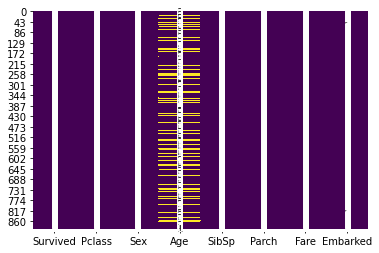

In [14]:
# heatmap for missing values
sns.heatmap(df.isnull(),annot=True,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

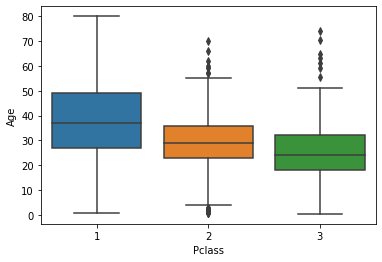

In [15]:
# checking Age relation with P class by boxplot
sns.boxplot(x=df['Pclass'],y=df['Age'])

From above boxplot we can see that
    
    Pclass 1 = mean Age is 37,
    Pclass 2 = mean age is 29,
    Pclass 3 = mean age is 25

In [16]:
## Function  to fill age missing values
def Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 25
    else:
        return 30
## Apply this function to Age column.  

In [17]:
#Apply above function to fill Age column with respected Age
df['Age']=df[["Age","Pclass"]].apply(Age,axis=1)

In [18]:
## Fill missing value of Embarked column with Q
df['Embarked']=df['Embarked'].fillna('Q')

In [19]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

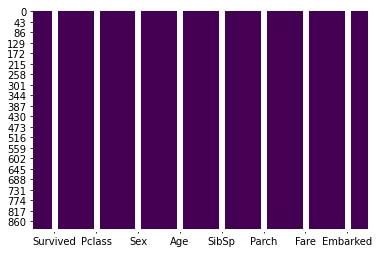

In [20]:
## heatmap to Check any missing values present or not
sns.heatmap(df.isnull(),annot=True,cbar=False,cmap='viridis')

No missing values found.

In [21]:
## Checking Duplicate values
df.duplicated().sum()

351

351 duplicate values found.

### Label Encoder to convert categorical data to numerical data.

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['Sex','Embarked']]=df[['Sex','Embarked']].apply(le.fit_transform)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,30,1,0,7.2500,2
1,1,1,0,30,1,0,71.2833,0
2,1,3,0,30,0,0,7.9250,2
3,1,1,0,30,1,0,53.1000,2
4,0,3,1,30,0,0,8.0500,2


### Outliers Clipping

<AxesSubplot:>

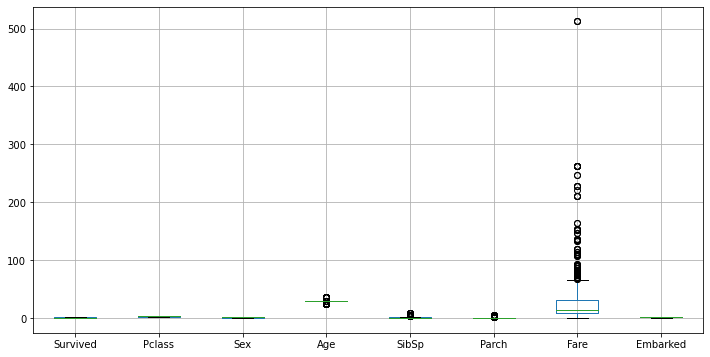

In [23]:
## Checking Outlierswith the help of boxplot
plt.figure(figsize=(12,6))
df.boxplot()

In [24]:
## Clip Outliers function
def clipValues(df,lower,upper):
    for col in df.columns:
        l=df[col].quantile(lower)
        u=df[col].quantile(upper)
        df[col]=df[col].clip(l,u)
    return df

<AxesSubplot:>

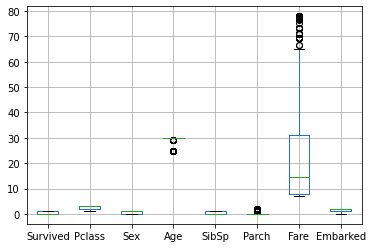

In [25]:
df1=df
df1=clipValues(df1,0.05,0.90)
df1.boxplot()

In [26]:
df.shape

(891, 8)

In [27]:
df1.shape

(891, 8)

### Checking data is balance or not

In [28]:
df1["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

F:\Installed\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

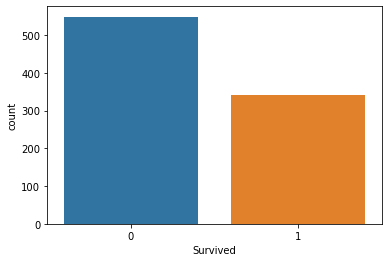

In [29]:
sns.countplot(df1["Survived"])

data is nearly balance.

## Implemeting gradient Booster

In [30]:
x=df1.drop(columns='Survived')
y=df1["Survived"]

In [31]:
## Data splitting to train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
## Model training
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=300)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=300)

In [33]:
## Model Testing
ypred=model.predict(xtest)

Accuracy: 0.8161434977578476
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



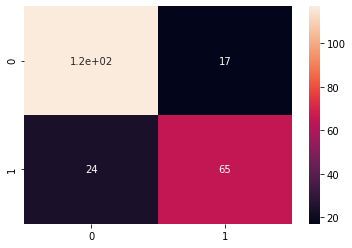

In [34]:
## Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [35]:
help(model)

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a si

### Tuning paramemters

In [36]:
# Model
model=GradientBoostingClassifier()

## Paramenters
loss=['deviance', 'exponential']
learning_rate=[0.01,0.1]
n_estimators=[10,20,50,100]
criterion=['friedman_mse', 'mse', 'mae']
max_depth=range(1,5)

#grid
grid=dict(loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,criterion=criterion,max_depth=max_depth)

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)

#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,cv=cv,param_grid=grid,scoring='accuracy')

#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 50}
0.8143680095761793


### Retraining Model

In [37]:
# Model Re-Training
model=GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'deviance',max_depth= 2,n_estimators=30)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=2, n_estimators=30)

In [38]:
# Model Re-Testing
ypred=model.predict(xtest)

Accuracy: 0.8071748878923767
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       134
           1       0.83      0.65      0.73        89

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



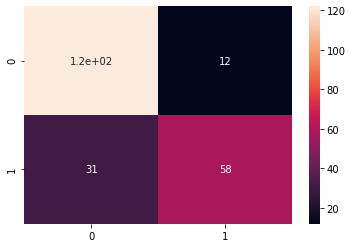

In [39]:
## Model Re-evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

## Standard Scaler

In [40]:
x=df1.drop(columns='Survived')
y=df1["Survived"]

In [41]:
## Data splitting to train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [42]:
## Using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [43]:
# Model Training on scaled data
from sklearn.ensemble import GradientBoostingClassifier
model_sc=GradientBoostingClassifier(n_estimators=20)
model_sc.fit(sc_xtrain,ytrain)

GradientBoostingClassifier(n_estimators=20)

In [44]:
## Model Testing 
ypred_sc=model_sc.predict(sc_xtest)

Accuracy: 0.8161434977578476
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       134
           1       0.82      0.69      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



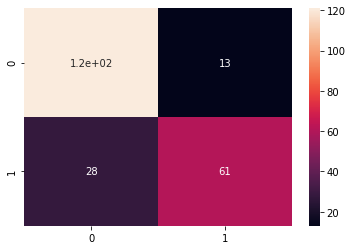

In [45]:
## Model Re-evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred_sc)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred_sc))
print(classification_report(ytest,ypred_sc))

In [46]:
# Model
model=GradientBoostingClassifier()

## Paramenters
loss=['deviance', 'exponential']
learning_rate=[0.01,0.1]
n_estimators=[10,20,30,40,50]
criterion=['friedman_mse', 'mse', 'mae']
max_depth=range(1,5)

#grid
grid=dict(loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,criterion=criterion,max_depth=max_depth)

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)

#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,cv=cv,param_grid=grid,scoring='accuracy')

#result
res=grid_cv.fit(sc_xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
F:\Installed\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a le

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 40}
0.8148692627090114


In [47]:
# Model Re-Training on scaled data
model=GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'deviance',max_depth= 2,n_estimators=20)
model.fit(sc_xtrain,ytrain)

GradientBoostingClassifier(max_depth=2, n_estimators=20)

In [48]:
# Model Retesting
ypred=model.predict(sc_xtest)

Accuracy: 0.8071748878923767
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       134
           1       0.82      0.66      0.73        89

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



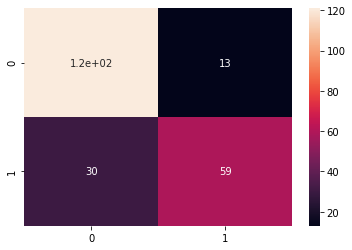

In [49]:
## Model Re-evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Accuracy Before Tuning 
Accuracy: 0.8161434977578476
                
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

n_estimators requires is 300

### Accuracy After Tuning
Accuracy: 0.8071748878923767
              
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       134
           1       0.83      0.65      0.73        89

n_estimatos requires is 30.

### Accuracy on Standard Scaler data before Tuning
Accuracy: 0.8161434977578476
              
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       134
           1       0.82      0.69      0.75        89

n_estimatos requires is 20

### Accuracy on Standard Scaler data After Tuning
Accuracy: 0.8071748878923767
              
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       134
           1       0.81      0.67      0.74        89
n_estimatos requires is 20

#### GradientBoosting gives the accuracy in the range of 75-85 only the number of estimators required is less on scaled data as compare to normal data.Overall it gives good result on scaled data as compare to others.